In [3]:
import pandas as pd

user = pd.read_csv('data/custom_data.csv')
user.head(10)

import seaborn as sns
from matplotlib import pyplot as plt

# 데이터 스케일링
user_mean = user.mean()  # 각 컬럼의 평균값
user_std = user.std()    # 각 컬럼의 표준편차
scaled_df = (user - user_mean) / user_std  # 컬럼별 표준화

# PCA를 위한 패키지 불러오기
from sklearn.decomposition import PCA

PCA를 적용할 때 몇 개의 주성분으로 차원을 축소시킬 지 정해야 되는데요.  
이 때 Scree plot이란 게 사용됩니다.

Scree plot은 각 주성분이 전체 데이터에 대해서 갖는 설명력 비율을 시각화한 플롯입니다.  
좀 더 정확하게 얘기하면, <span style='color:yellowgreen'>전체 주성분의 분산 대비 특정 주성분의 분산의 비율을 시각화한 것</span>입니다.  
지난 레슨에서 사용한 `scaled_df`를 예시로 더 자세하게 설명해 볼게요.

In [4]:
pca = PCA(n_components=6)
pca.fit(scaled_df)  # PCA 학습
scaled_df_pc = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.043476,0.646301,-0.249843,0.704499,-0.066913,0.376684
1,1.926976,0.528713,0.431355,1.255031,0.085687,0.642017
2,-1.501383,-0.117994,0.800846,0.379732,-0.367393,-0.553751
3,1.168100,-1.373146,0.668054,-0.608071,0.036437,-0.285106
4,0.226542,-0.077045,-1.553274,-1.107927,-0.463466,-0.381861


이젠 6개의 PC가 각각 전체 데이터에 대해서 어느 정도의 설명력을 가지는지,  
즉 전체 분산 대비 어느 정도의 분산 비율을 가지는지 확인해 보겠습니다.  
각 주성분의 분산 비율을 계산하기 위해서는 scikit-learn의 `PCA`에 있는 `explained_variance_ratio_` 속성을  
활용하면 됩니다.

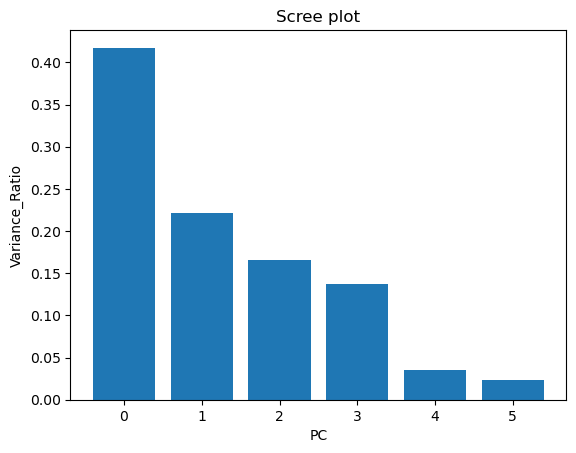

In [5]:
import numpy as np

# PCA 개수
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)  # arange: 일정 간격으로 값을 생성하여 배열 반환. 이 경우 숫자 범위이므로 num_components 개수 만큼의 값이 있는 배열이 생성됨.
var = pca.explained_variance_ratio_

plt.bar(x, var)  # bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

주성분 1(PC1)은 전체 주성분이 설명해 주는 데이터의 특성 대비 약 40% 정도를 설명하고, 주성분 2(PC2)는  
약 20% 정도를 설명하고 있네요.

플롯의 결과를 바탕으로 최적의 주성분 개수를 구해야 하는데요.  
기준은 간단합니다. 바로, <span style='color:yellowgreen'>PC1부터 PC_N까지 분산 비율의 합을 누적했을 때  
전체 대비 70% 이상이 되는 PC_N을 고르면 됩니다</span>.  
그래도 전체 분산 대비 분산 비율이 70%는 되어야 원본 데이터가 충분히 설명된다고 보는 거죠.

주성분들의 누적 분산 비율은 코드로 아래와 같이 계산할 수 있는데요.

In [6]:
cum_var = np.cumsum(var)  # 누적 분산비율 구하기
cum_vars = pd.DataFrame({'cum_vars': cum_var}, index = pca_df.columns)  
        #  컬럼에는 cum_var 데이터를 cum_vars라는 컬럼명으로 넣고, 행 인덱스는 PC1, PC2, ...로 설정해서 데이터프레임으로 만듦.

cum_vars 

,cum_vars
PC1,0.417326
PC2,0.638633
PC3,0.804805
PC4,0.941612
PC5,0.976473
PC6,1.000000


결과를 확인하니 3개의 주성분(PC1, PC2, PC3)이 있을 때 전체 주성분이 데이터를 설명하는 정도 대비  
약 80% 정도를 설명하는 것으로 나옵니다.  
즉, 해당 경우에는 주성분을 3개로 차원을 축소하는 게 적절하다고 할 수 있죠.

물론, 70%가 절대적인 기준은 아닙니다. 데이터의 복잡성과 분석 목적에 따라 충분히 달라질 수 있죠.  
예를 들어, 데이터가 상대적으로 단순하면 70% 이상의 누적 설명력을 충족하는 주성분 개수를 선택하는 것으로 충분할 수 있습니다.  
반면에, 데이터가 복잡하고 누적 설명력이 높아야 하는 경우에는 80% 이상, 혹은 더 높은 누적 설명력을 가지는 주성분 개수를  
선택해야 할 수도 있습니다. 또한, 분석의 목적 상 차원이 높은 데이터를 시각화하여 데이터의 특징을 파악하는 게 필요할 수도 있는데요.  
그럴 경우에는 Scree plot의 결과와 상관없이 차원을 2개 또는 3개로 축소시키기도 합니다.